In [1]:
import numpy as np
from tomo_encoders import Voids
import matplotlib.pyplot as plt
import open3d as o3d
from tomo_encoders.misc.voxel_processing import _edge_map
from tomo_encoders.misc import viewer
voids_lowres = '/home/atekawade/Dropbox/Arg/transfers/runtime_plots/voids_lowres'

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
voids = Voids().import_from_disk(voids_lowres)
# do stuff
idx_max = np.argmax(voids["sizes"])
void = voids["x_voids"][idx_max]
void_surf = _edge_map(void)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

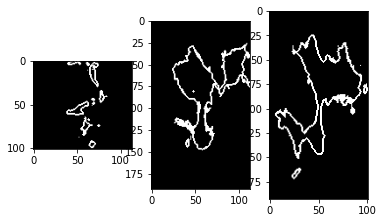

In [3]:
viewer.view_midplanes(void_surf)

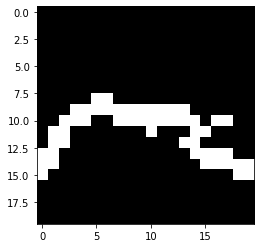

In [10]:
plt.imshow(void_surf[75, 30:50, 40:60], cmap = 'gray')

In [4]:
pcd = o3d.geometry.PointCloud()
pts = np.asarray(np.where(void_surf)).T
pcd.points = o3d.utility.Vector3dVector(pts)
pcd.estimate_normals()
print(f'normals: {np.shape(pcd.normals)}, points: {np.shape(pcd.points)}')

normals: (94620, 3), points: (94620, 3)


In [7]:
o3d.visualization.draw_geometries([pcd], point_show_normal = True)

In [6]:
pcd = o3d.geometry.PointCloud()
pts = np.asarray(np.where(void)).T
pcd.points = o3d.utility.Vector3dVector(pts)
pcd.estimate_normals()
print(f'normals: {np.shape(pcd.normals)}, points: {np.shape(pcd.points)}')

normals: (180262, 3), points: (180262, 3)


In [11]:
o3d.__version__

'0.15.2'